# N.4 : Débruitage

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Algorithmes

**Calcul de l'histogramme**

In [2]:
def computes_hist(img):
    """
    Parameter
    ---------
    img : Numpy Array (HxW)
    Returns
    -------
    output: Numpy Array
        256d-array where the ith element corresponds to
        the number of pixels.
    """
    output = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[int(img[i][j])] += 1
    
    return output

**Etirement**

In [3]:
def enhance_contrast(img):
    return 255*((img-img.min())/(img.max()-img.min()))

**Egalisation**

In [4]:
def uniformization(img):
    hist = computes_hist(img)
    output_img = np.zeros(img.shape)
    N = output_img.shape[0]*output_img.shape[1]
    for i in range(output_img.shape[0]):
        for j in range(output_img.shape[1]):
            output_img[i][j] = (255/N)*sum(hist[:int(img[i][j])])
    return output_img

### Bruitage

In [5]:
def add_noise(img, mode):
    """ Adds noise in a grayscaled image.
    Parameters
    ----------
    img: Numpy Array
        Input image data. Will be converted to float.
    mode: string
        One of the following strings, selecting the type of noise to add:

        - 'gauss'   Gaussian-distributed additive noise.
        - 's&p'     Replaces random pixels with 0 or 1. 
    """
    if mode == "gauss":
        mean = 0.0   # some constant
        var = 0.02
        std = var**0.5    # some constant (standard deviation)
        noisy_img = img + np.random.normal(mean, std, img.shape)
        noisy_img_clipped = np.clip(noisy_img, 0, 255)
        return noisy_img_clipped
    elif mode == "s&p":
        row, col = img.shape
        s_vs_p = 0.5
        amount = 0.05
        out = np.copy(img)
        # salt mode
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [
            np.random.randint(0, i-1, int(num_salt))
            for i in img.shape
        ]
        out[coords] = 1
        # pepper mode
        num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
        coords = [
            np.random.randint(0, i-1, int(num_pepper))
            for i in img.shape
        ]
        out[coords] = 0
        return out

### Exercice 1 : Débruitage par filtre médian

Débruitage par filtre médian de l’image suivante déjà traitée dans la séance
d’Histogramme.

In [6]:
def median_filter(img, kernel_size=3, stride=1, padding=1):
    output = np.copy(img)
    border = cv2.copyMakeBorder(
        img,
        top=padding,
        bottom=padding,
        left=padding,
        right=padding,
        borderType=cv2.BORDER_CONSTANT,
        value=0
    )

    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
             sub_img = border[i:i+kernel_size, j:j+kernel_size].flatten()
             median = np.median(sub_img)
             output[i][j] = median

    return output



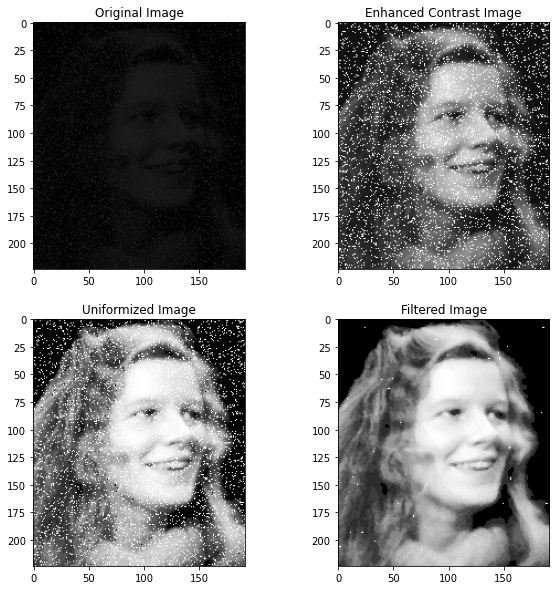

In [7]:
# loads image
original_img = cv2.imread("./data/histo_imageTest_entree.png")
tmp_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
# enhances contrast
enhanced_img = enhance_contrast(tmp_img)
# uniformizes
uniformed_img = uniformization(enhanced_img)
# applies median filter
filtered_img = median_filter(uniformed_img, kernel_size=3, padding=1)

fig, axs = plt.subplots(2,2, figsize=(10, 10))
axs[0][0].set_title("Original Image")
axs[0][0].imshow(original_img)
axs[0][1].set_title("Enhanced Contrast Image")
axs[0][1].imshow(enhanced_img, cmap=plt.cm.gray)
axs[1][0].set_title("Uniformized Image")
axs[1][0].imshow(uniformed_img, cmap=plt.cm.gray)
axs[1][1].set_title("Filtered Image")
axs[1][1].imshow(filtered_img, cmap=plt.cm.gray)

### Exercice 2 :

**1.** Lire le fichier d’image (l’image de test pour cette séance est ‘lena.gif’, ou 'circuit.tif' ou ‘cameraman.tif’).

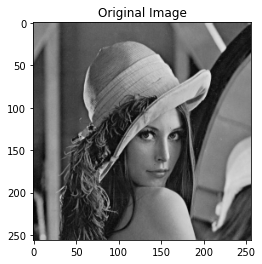

In [8]:
original_img = cv2.imread("./data/lena.jpg")
scale_percent = 50 # percent of original size
width = int(original_img.shape[1] * scale_percent / 100)
height = int(original_img.shape[0] * scale_percent / 100) 
original_img = cv2.resize(original_img, dsize=(width, height), interpolation=cv2.INTER_AREA)
plt.title("Original Image")
plt.imshow(original_img)

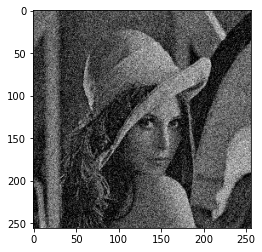

In [9]:
tmp_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
tmp_img = tmp_img / 255
mean = 0.0   # some constant
var = 0.02
std = var**0.5    # some constant (standard deviation)
noisy_img = tmp_img + np.random.normal(mean, std, tmp_img.shape)
noisy_img_clipped = np.clip(noisy_img, 0, 255)

plt.imshow(noisy_img_clipped, cmap=plt.cm.gray)

**2.** Ajouter à l'image originale le bruit de type gaussien de moyenne nulle et de variance 0.04 (4% de la valeur max), et de type ‘salt & pepper’. (fonction imnoise(I, 'gaussian/ salt & pepper', mean,var) ). Afficher les deux images ainsi bruitées.

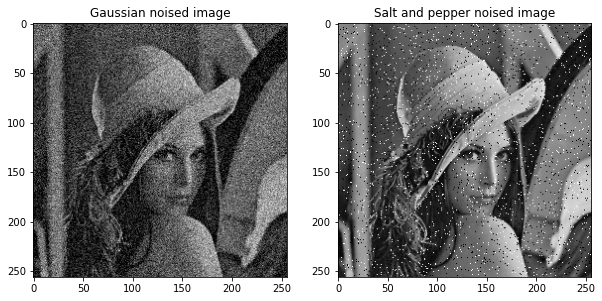

In [10]:
tmp_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

gauss_noise_img = add_noise(tmp_img / 255, mode='gauss')
sp_noise_img = add_noise(tmp_img / 255, mode='s&p')

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title("Gaussian noised image")
axs[0].imshow(gauss_noise_img, cmap=plt.cm.gray)
axs[1].set_title("Salt and pepper noised image")
axs[1].imshow(sp_noise_img, cmap=plt.cm.gray)

**3.** Appliquer sur les deux images bruitées un filtre moyenneur rectangulaire de taille 3x3, afficher et commenter les résultats obtenus.

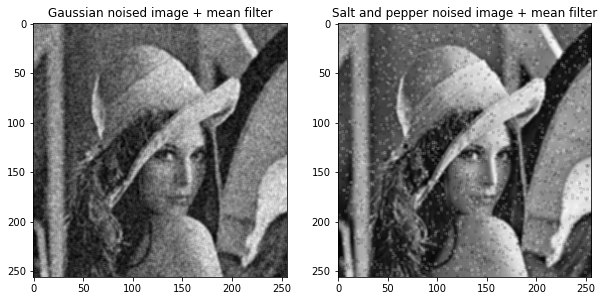

In [11]:
kernel = np.ones((3,3),np.float32)/9
gauss_dst1 = cv2.filter2D(gauss_noise_img, -1, kernel)
sp_dst1 = cv2.filter2D(sp_noise_img, -1, kernel)

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title("Gaussian noised image + mean filter")
axs[0].imshow(gauss_dst1, cmap=plt.cm.gray)
axs[1].set_title("Salt and pepper noised image + mean filter")
axs[1].imshow(sp_dst1, cmap=plt.cm.gray)

**4.** Appliquer sur les deux images bruitées le «filtre médian», afficher et commenter les résultats obtenus.

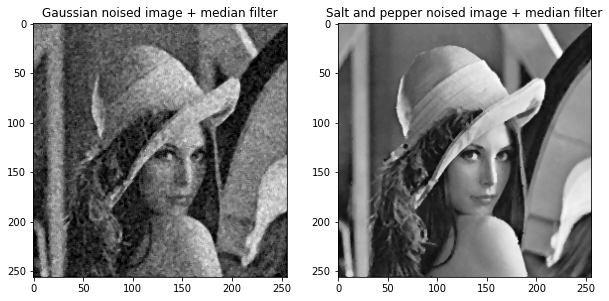

In [12]:
gauss_dst2 = median_filter(gauss_noise_img, kernel_size=3, padding=1)
sp_dst2 = median_filter(sp_noise_img, kernel_size=3, padding=1)

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title("Gaussian noised image + median filter")
axs[0].imshow(gauss_dst2, cmap=plt.cm.gray)
axs[1].set_title("Salt and pepper noised image + median filter")
axs[1].imshow(sp_dst2, cmap=plt.cm.gray)

**5.** Comparer **3.** et **4.**.

*Réponse :* Alors que les performances des deux filtres sont très similaires sur l'image avec le bruit gaussien, le filtre médian est très efficace sur l'image avec le bruit impulsionnel.

**6.** Commenter sur l'atténuation du bruit et la qualité/détérioration des détails en fonction de la largeur du filtre moyenneur, puis le choix de la largeur adaptée ou optimale.

In [13]:
def gen_kernel(size):
    return np.ones((size, size), np.float32)/(size**2)

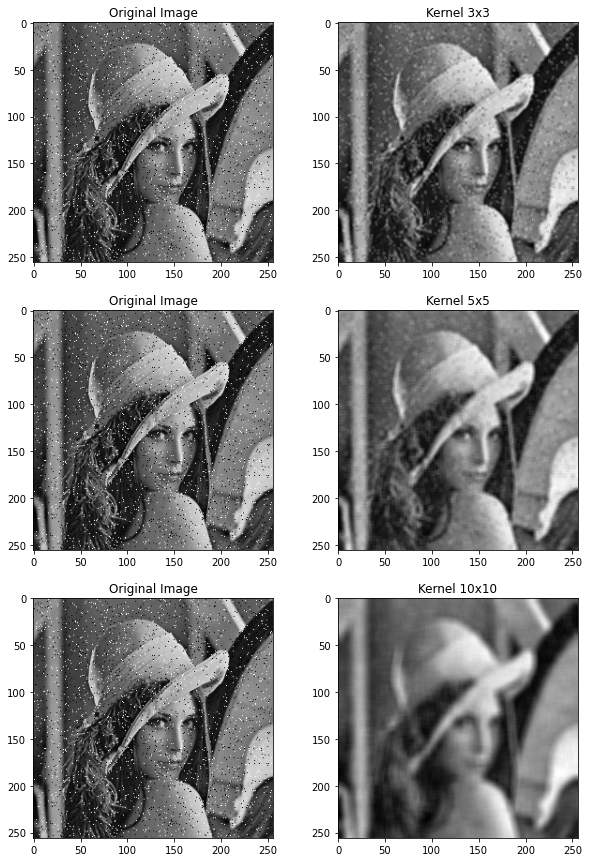

In [14]:
# copies salt & pepper noised image
img = np.copy(sp_noise_img)

output_r3 = cv2.filter2D(img, -1, gen_kernel(3))
output_r5 = cv2.filter2D(img, -1, gen_kernel(5))
output_r10= cv2.filter2D(img, -1, gen_kernel(10))

fig, axs = plt.subplots(3,2, figsize=(10,15))

axs[0][0].set_title("Original Image")
axs[0][0].imshow(img, cmap=plt.cm.gray)
axs[0][1].set_title("Kernel 3x3")
axs[0][1].imshow(output_r3, cmap=plt.cm.gray)
axs[1][0].set_title("Original Image")
axs[1][0].imshow(img, cmap=plt.cm.gray)
axs[1][1].set_title("Kernel 5x5")
axs[1][1].imshow(output_r5, cmap=plt.cm.gray)
axs[2][0].set_title("Original Image")
axs[2][0].imshow(img, cmap=plt.cm.gray)
axs[2][1].set_title("Kernel 10x10")
axs[2][1].imshow(output_r10, cmap=plt.cm.gray)